In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


- sample_submission is a sample for final result!

# Loading Library

In [35]:
# library for data handling & visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# library for EDA, analyzing
import sklearn 
from scipy import stats

# version check
print( f'pandas version: {pd.__version__}')

print( f'numpy version: {np.__version__}')

print( f'matplotlib version: {mpl.__version__}')

print( f'seaborn version: {sns.__version__}')

pandas version: 2.2.3
numpy version: 1.26.4
matplotlib version: 3.7.5
seaborn version: 0.12.2


- sklearn : https://scikit-learn.org/stable/
    + scikit-learn, library about machine learning

# Loading Datasets

In [36]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
df_sub = pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")

df_train.shape, df_test.shape, df_sub.shape

((58645, 13), (39098, 12), (39098, 2))

In [37]:
df_origi = pd.read_csv("/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv")
df_origi.shape

(32581, 12)

- data from another notebook!
    + you can see feature's details link down below;
    + https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction

# feature Description
 - loan_gade meaning?
 - loan_status meaning? -- (1,0)
     + 0 means loan request approved, and 1 means loan request **not** approved.

In [38]:
df_origi.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


- what does 'loan_grade' means?

In [39]:
df_origi.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [40]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Data Handling

In [41]:
df_train = df_train.drop(columns = ['id'])
df_test = df_test.drop(columns = ['id'])

df_train.shape, df_test.shape

((58645, 12), (39098, 11))

- updated columns: ignore "['colname'] not found in axis" error unless you need it.

In [42]:
df_train = pd.concat([df_train, df_origi], axis = 0)

- don't execute this code multiple times! it will ifnfinetly add dataframes!

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [44]:
df_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,91226.000000,9.122600e+04,90331.000000,91226.000000,88110.000000,91226.000000,91226.000000,91226.000000
mean,27.616480,6.477071e+04,4.732119,9350.348607,10.789508,0.163154,5.810219,0.169447
std,6.148115,4.793696e+04,4.025068,5848.605423,3.108998,0.097491,4.038412,0.375149
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.000000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.700000e+04,4.000000,8000.000000,10.950000,0.140000,4.000000,0.000000
75%,30.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.220000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# Null data handling

In [45]:
df_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

- Many NaN in person_emp_length & loan_int_rate

In [46]:
df_test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [47]:
df_train['person_emp_length'].fillna(df_train['person_emp_length']
                                     .mean(), inplace = True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate']
                                 .mean(), inplace = True)



/tmp/ipykernel_30/2857315162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length']
/tmp/ipykernel_30/2857315162.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [48]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

# EDA - Explratory Data Analysis
- making stacked bar function, cdf plot, etc...
- Mainly with Visualization

In [49]:
def stacked_bar_plot(df, feature, target = "loan_status"):
    crosstab = pd.crosstab(df[feature], df[target], 
                           normalize = "index")
    crosstab.plot(kind = 'bar', stacked = True, figsize = (12,6)
                 , cmap = "coolwarm")
    plt.title(f"Stacked Bar Plot Of {feature} VS {target}")
    plt.ylabel("Proportion")
    plt.show()

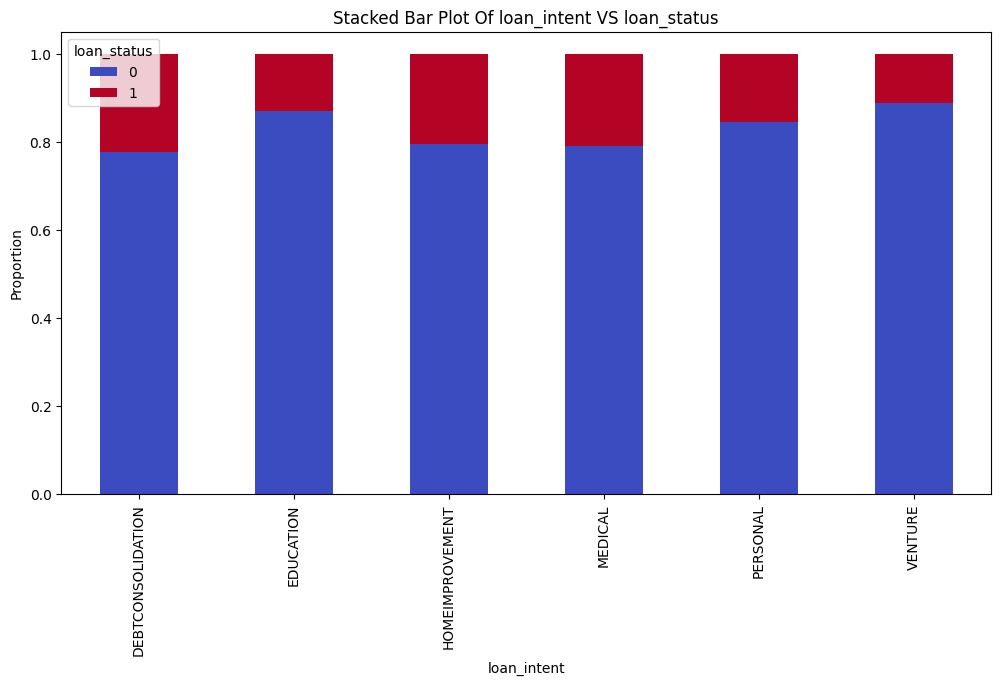

In [50]:
stacked_bar_plot(df_train, 'loan_intent')

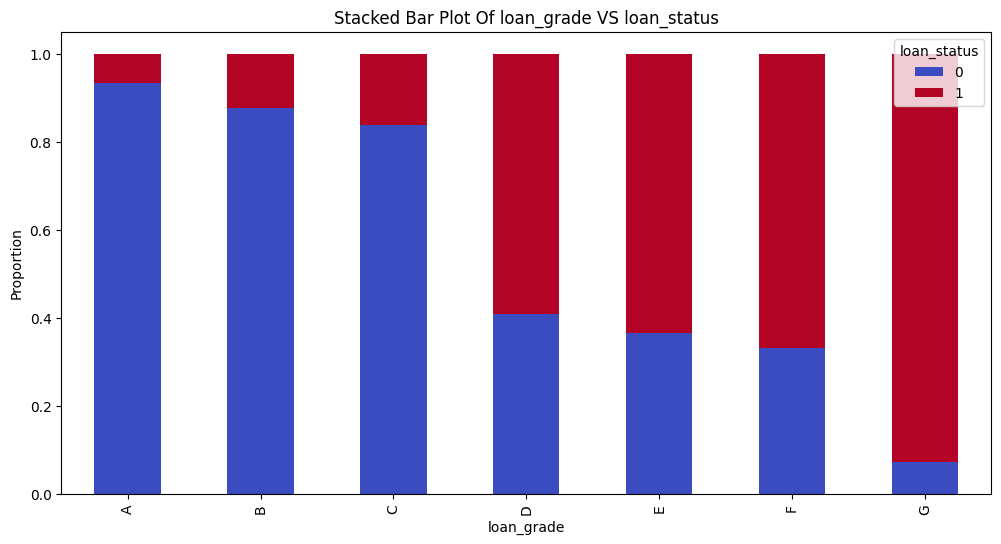

In [51]:
stacked_bar_plot(df_train, 'loan_grade')

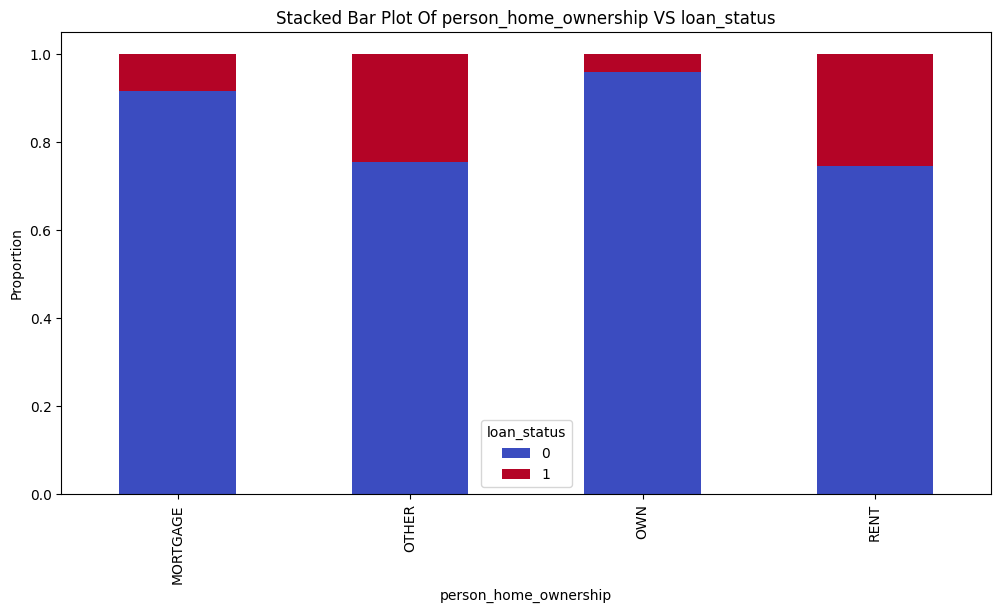

In [52]:
stacked_bar_plot(df_train, 'person_home_ownership')

- A mortgage is a loan specifically designed for purchasing a home. It allows you to spread the cost over many years, making homeownership more attainable.

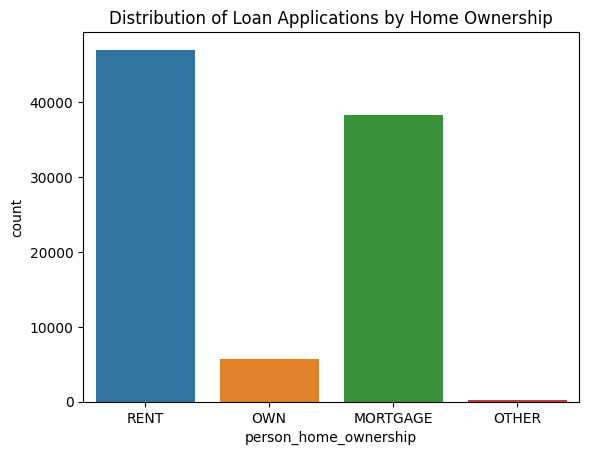

In [53]:
sns.countplot(data = df_train, x = 'person_home_ownership')
plt.title('Distribution of Loan Applications by Home Ownership')
plt.show()

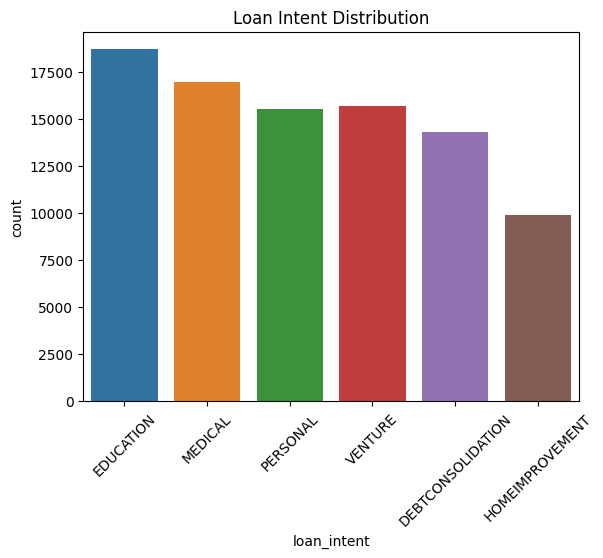

In [54]:
sns.countplot(data = df_train, x = 'loan_intent')
plt.title('Loan Intent Distribution')
plt.xticks(rotation = 45)
plt.show()

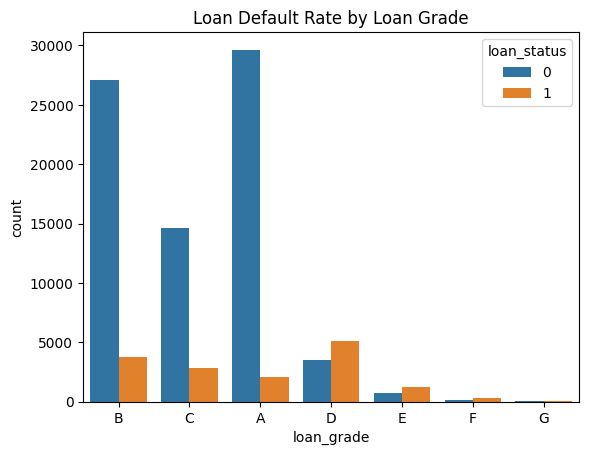

In [55]:
sns.countplot(data = df_train, x = 'loan_grade', hue = 'loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()

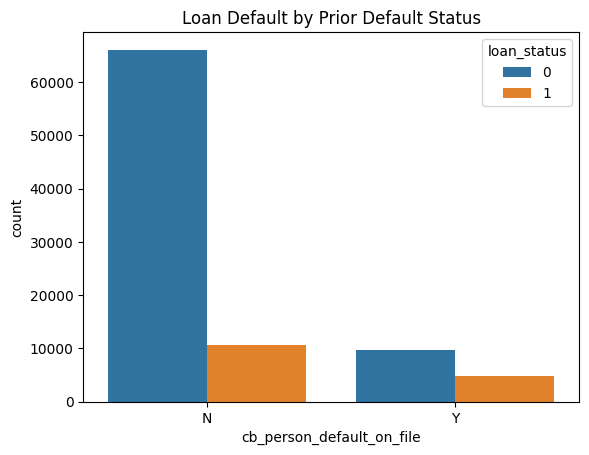

In [56]:
sns.countplot(data = df_train, x = 'cb_person_default_on_file',
              hue = 'loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()

- Summary about def plot_boxplots
    + Get df as DataFrame, columns as list of df's column or columns
    + Enumerate() returns 'columns' index number and list's item as tuple.
    + When for i , col in enumerate(columns, start = 1):, i returns indexs start with 1, col returns name of list 'columns'

In [57]:
def plot_boxplots(df, columns):
    plt.figure(figsize = (12,6))
    for i , col in enumerate(columns, start = 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y = df[col], color = 'lightblue')
        plt.title(f"Box Plot of {col}")
    plt.tight_layout()
    plt.show()

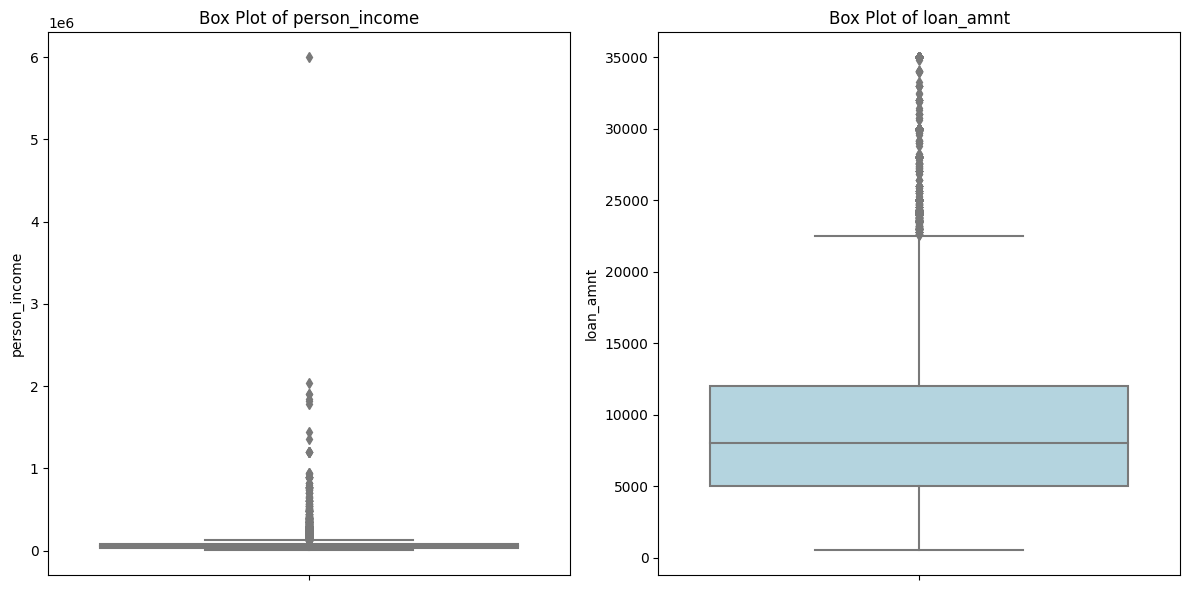

In [58]:
plot_boxplots(df_train, ['person_income', 'loan_amnt'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


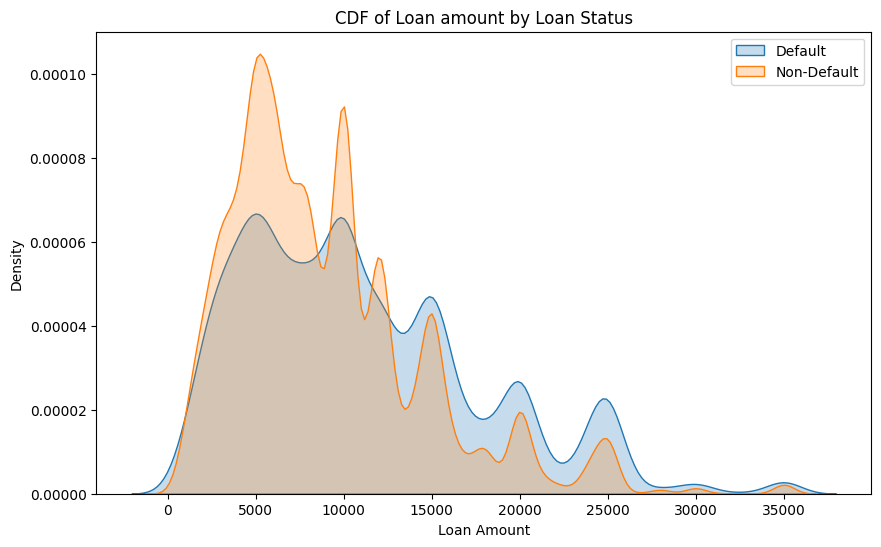

In [59]:
plt.figure(figsize = (10,6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'],
           label = 'Default', fill= True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'],
           label = 'Non-Default', fill = True)

plt.title("CDF of Loan amount by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

- What is kdeplot?
- What is CDF?

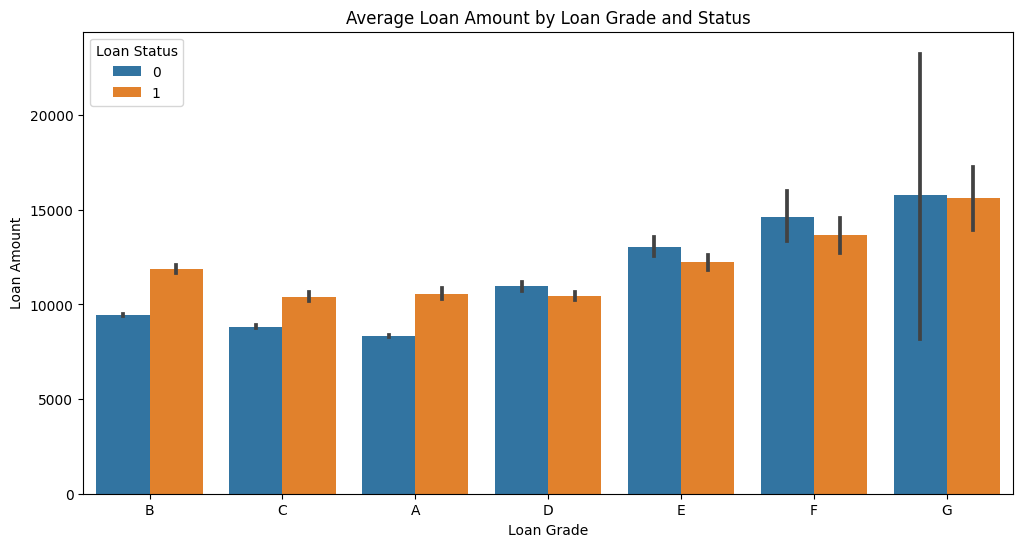

In [60]:
plt.figure(figsize = (12,6))

sns.barplot(x = 'loan_grade',
           y = 'loan_amnt',
           hue = 'loan_status',
           data = df_train,
           estimator = np.mean)

plt.title("Average Loan Amount by Loan Grade and Status")
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.legend(title = "Loan Status")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

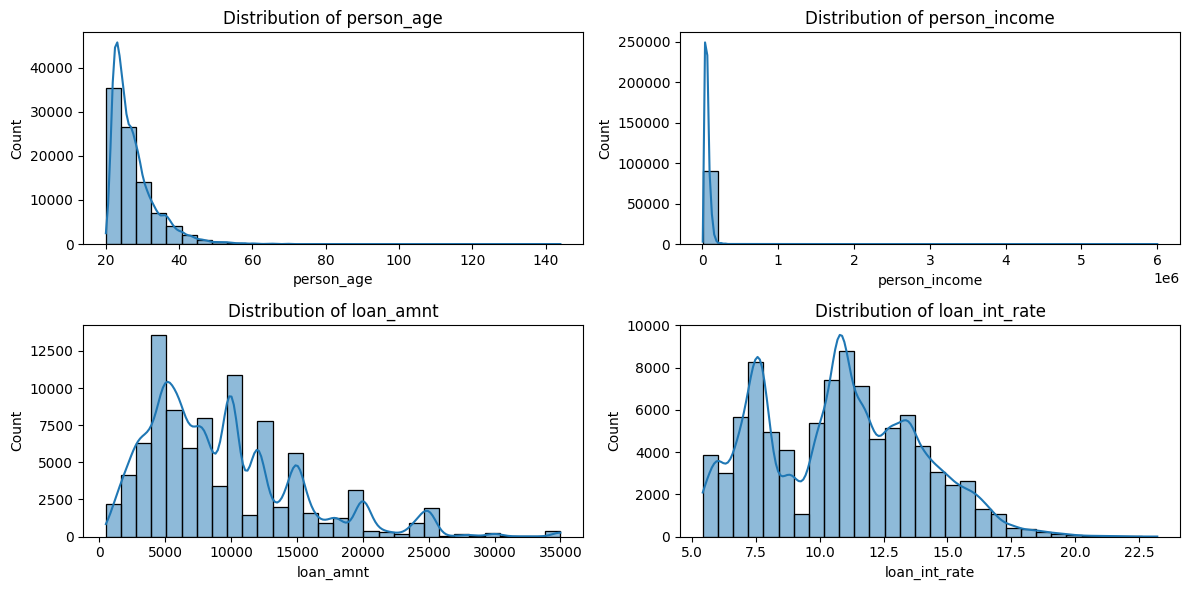

In [61]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

plt.figure(figsize = (12,6))

for i, feature in enumerate(num_features, start = 1):
    plt.subplot(2,2,i)
    sns.histplot(df_train[feature], bins = 30, kde = True)
    plt.title(f"Distribution of {feature}")
    
    
plt.tight_layout()
plt.show()
    

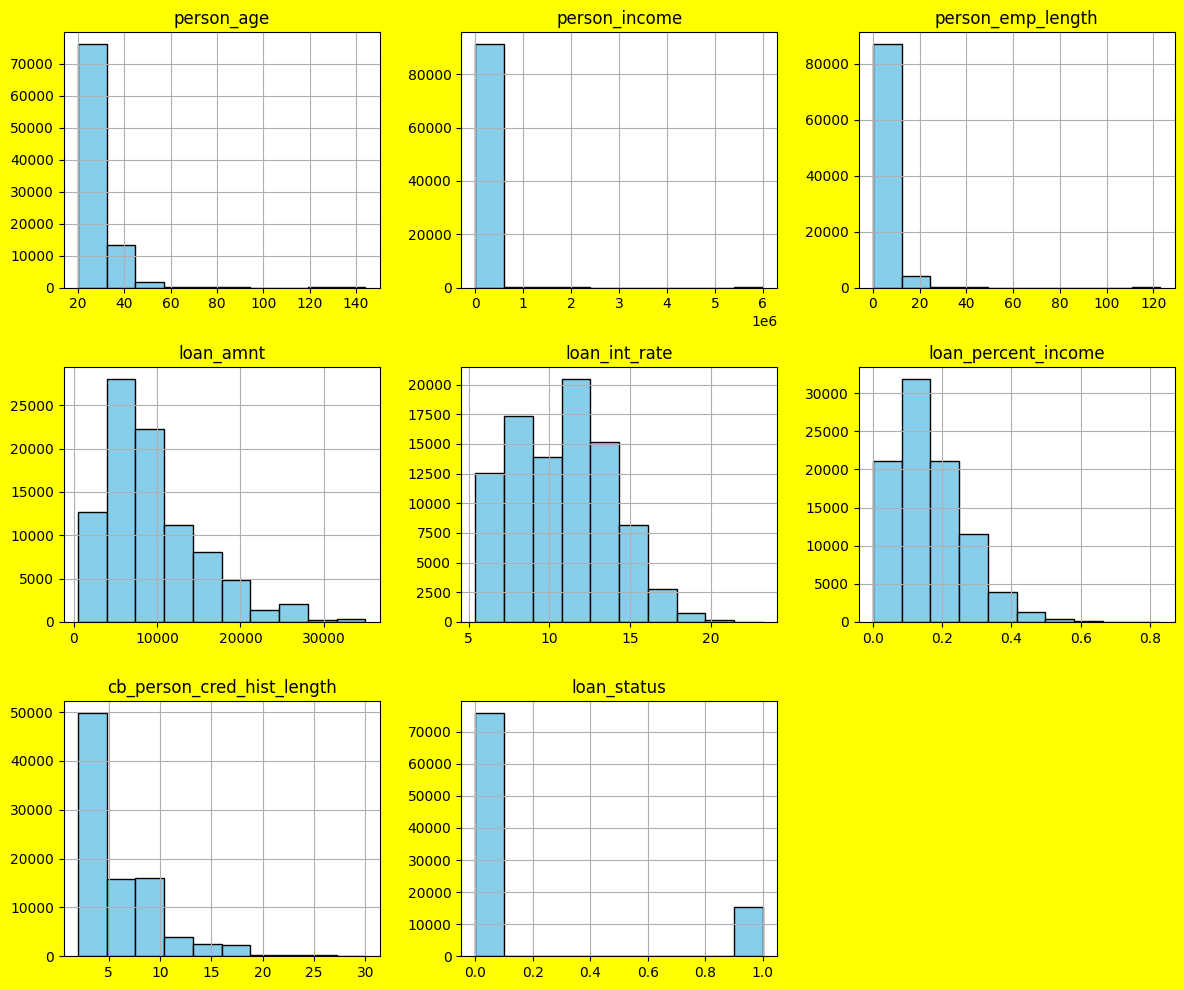

In [62]:
df_train.hist(figsize = (12,10), color = "skyblue", 
              edgecolor = 'black')
plt.gcf().set_facecolor("yellow")
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

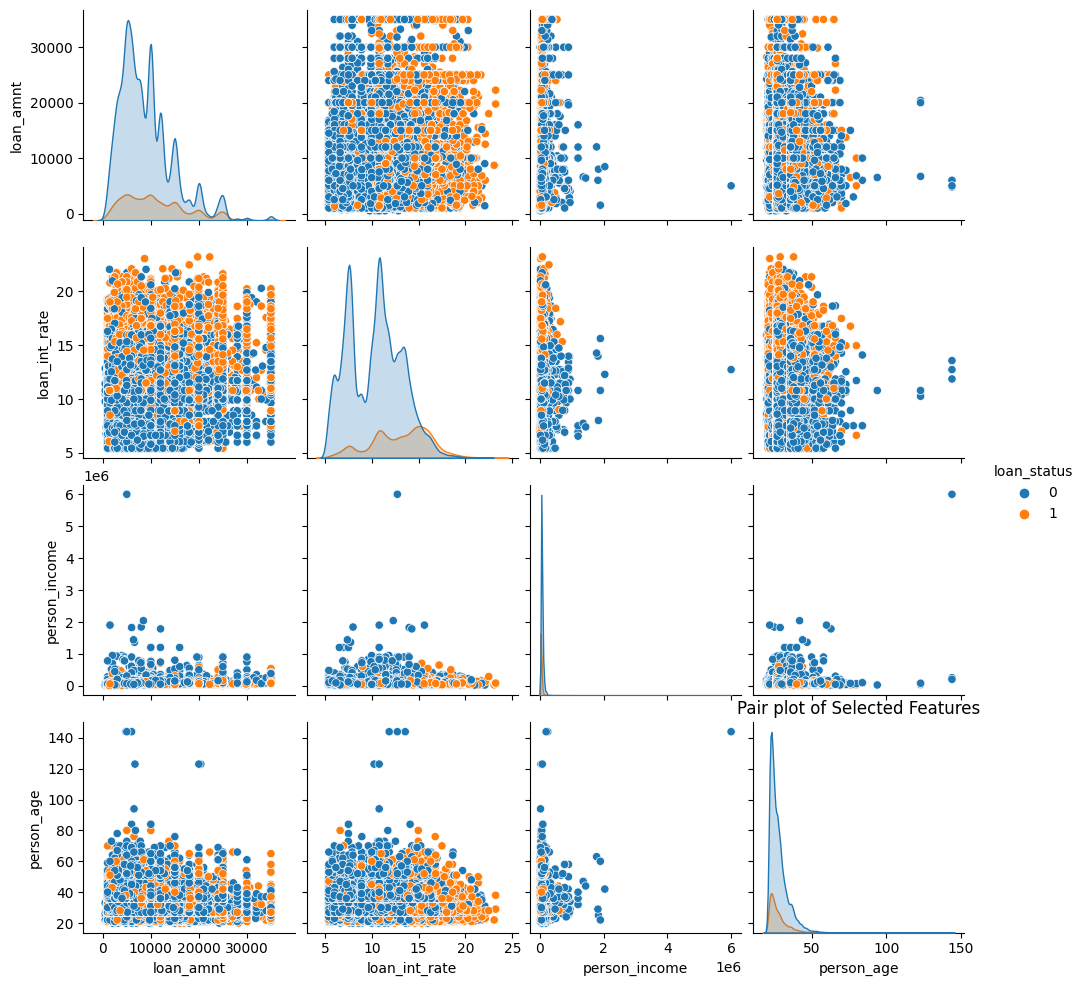

In [63]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income'
                  , 'person_age', 'loan_status']

sns.pairplot(df_train[subset_features], hue = 'loan_status')

plt.title('Pair plot of Selected Features')
plt.show()

# Using sklearn's LabelEncoder
- What is LabelEncoder? What does it do?

In [68]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):
    label_enc = LabelEncoder()
    label_cols = ['person_home_ownership', 'loan_grade',
                 'cb_person_default_on_file']

    # fit and transform via LabelEncoder
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])
    
    # dummy variables setting
    df_train = pd.get_dummies(df_train, columns = ['loan_intent'],
                             drop_first = True)
    df_test = pd.get_dummies(df_test, columns = ['loan_intent'],
                             drop_first = True)
    
    # setting df_test's columns
    target_col = "loan_status"
    train_columns = df_train.drop(columns = [target_col]).columns
    df_test = df_test.reindex(columns = train_columns, fill_value = 0)
    
    return df_train, df_test
    

In [71]:
df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

df_train = df_train_processed
df_test = df_test_processed

df_train.shape, df_test.shape

((91226, 16), (39098, 15))

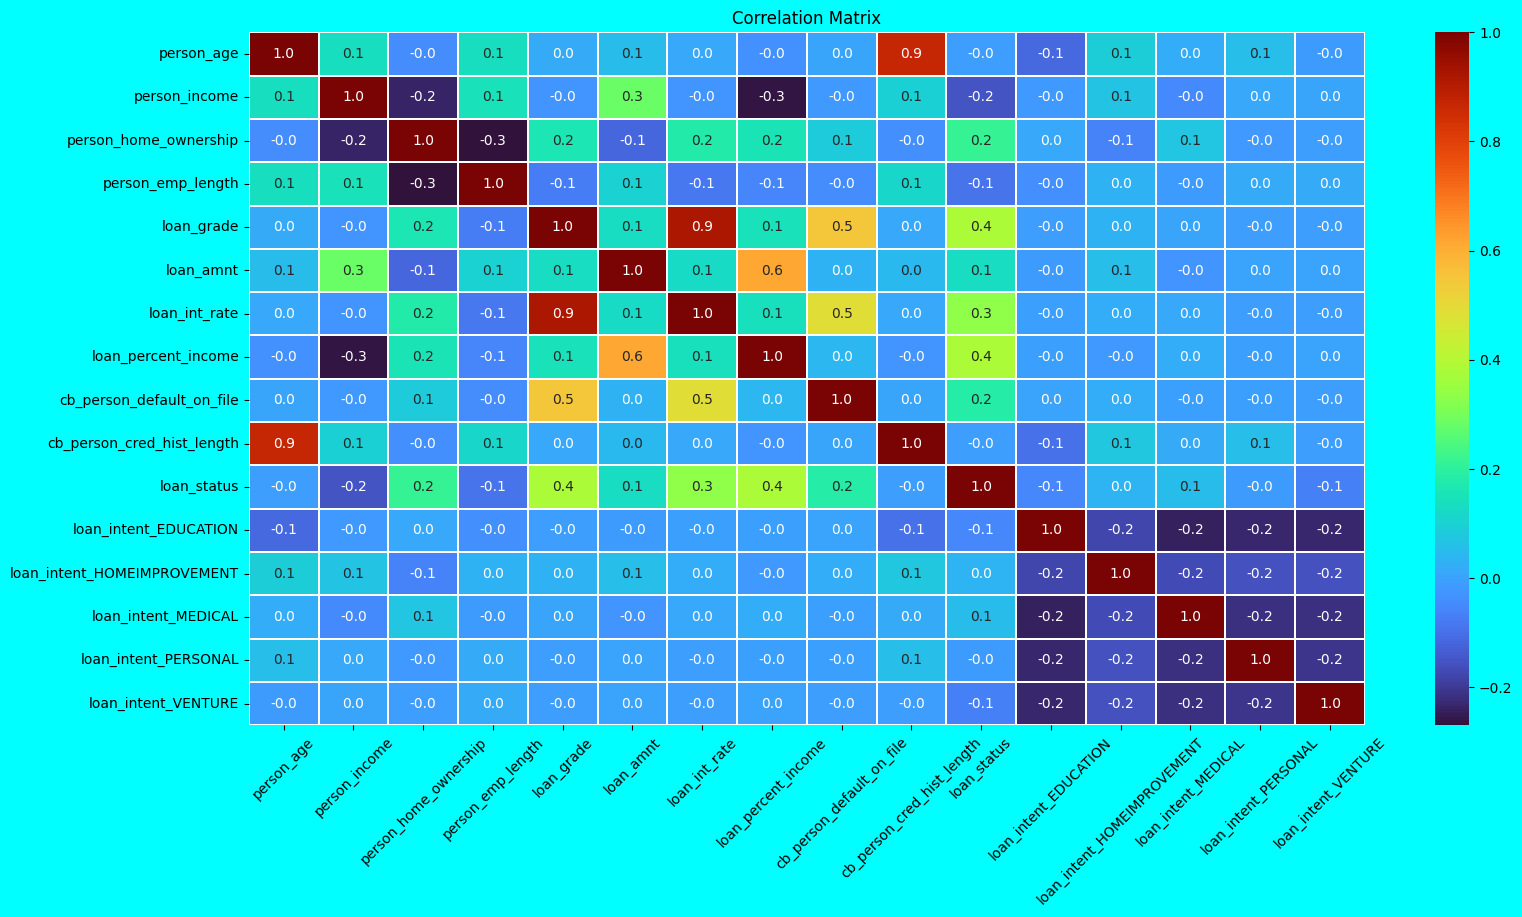

In [98]:
# drawing correlation matrix
# matrix that visualize cor w/ colors

correlation_matrix = df_train.corr()
plt.figure(figsize = (18,9))
sns.heatmap(correlation_matrix, annot = True, cmap = 'turbo',
           fmt = ".1f", linewidths = 0.2)
plt.gcf().set_facecolor('#00FFFF')
plt.xticks(rotation = 45)
plt.title("Correlation Matrix")
plt.show()

# Regression Analysis
- using scikit-learn?

In [99]:
# df's columns
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [101]:
# check data completery
df_test.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [102]:
# make def for feature calculation -> quantative economy

def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']

    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']

    df['income_per_year_emp'] = df['person_income'] / df['person_emp_length']

    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']

    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']

    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']

    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length']

    df['int_to_cred_hist'] = df['loan_int_rate'] / df['person_emp_length']

    df['int_per_year_emp'] = df['loan_int_rate'] / df['person_emp_length']

    df['loan_amt_per_emp_year'] = df['loan_amnt'] / df['person_emp_length']

    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']

    return df

In [103]:
# make df_train & df_test features calculated

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [ ]:
# set target & ind feature

y = df_train['loan_status']
df_train = df_train.drop(['loan_status'], axis = 1)
X = df_train

In [104]:
# use sklearn Scaler for feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [ ]:
# use lightGBM for advanced classify
# setting parameters.

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKfold

lgb_params = {
    'abjective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,
    'feature_fraction': 0.6236144085285287,
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3, 
    'verbose': -1
}

n_splits = 5
skf = StratifiedKfold(n_splits = n_splits, 
                      shuffle = True, random_state = 42)

lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))
